 Credit Scoring Project | CodeAlpha ML Internship Task.<br>
 Objective: Predict whether an individual has good or bad credit.<br>
 Dataset: Kaggle German Credit Data ([Link](https://www.kaggle.com/datasets/uciml/german-credit)).<br>
 Algorithms used: Logistic Regression, Decision Tree, Random Forest.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

sns.set_style('whitegrid')  


In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\archive\german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.shape

(1000, 11)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
df.isnull().sum()


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
df['Risk'] = df['Risk'].map({'good': 1, 'bad': 0})
df['Risk'].value_counts()


Risk
1    700
0    300
Name: count, dtype: int64

In [8]:
X = df.drop('Risk', axis=1)
y = df['Risk']


In [9]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64','float64']).columns

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')
Numerical columns: Index(['Unnamed: 0', 'Age', 'Job', 'Credit amount', 'Duration'], dtype='object')


In [10]:
X = pd.get_dummies(X, drop_first=True)
X.head()


,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,1169,6,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,1,22,2,5951,48,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,2,49,1,2096,12,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False
3,3,45,2,7882,42,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,4,53,2,4870,24,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 800
Testing samples: 200


In [13]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


In [14]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name, "trained successfully")


Logistic Regression trained successfully
Decision Tree trained successfully
Random Forest trained successfully


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.54      0.25      0.34        60
           1       0.74      0.91      0.81       140

    accuracy                           0.71       200
   macro avg       0.64      0.58      0.58       200
weighted avg       0.68      0.71      0.67       200

ROC-AUC Score: 0.66


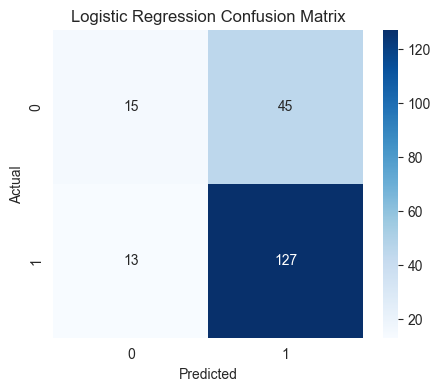

In [15]:
# Logistic Regression Evaluation
y_pred_lr = models['Logistic Regression'].predict(X_test)
y_proba_lr = models['Logistic Regression'].predict_proba(X_test)[:,1]

print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba_lr),2))

# Confusion Matrix Plot
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.42      0.37      0.39        60
           1       0.74      0.78      0.76       140

    accuracy                           0.66       200
   macro avg       0.58      0.57      0.57       200
weighted avg       0.64      0.66      0.65       200

ROC-AUC Score: 0.57


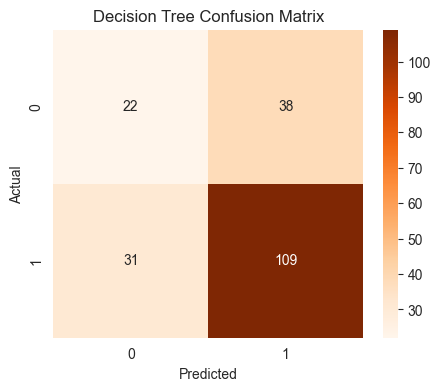

In [16]:
# Decision Tree Evaluation
y_pred_dt = models['Decision Tree'].predict(X_test)
y_proba_dt = models['Decision Tree'].predict_proba(X_test)[:,1]

print("Decision Tree Evaluation:")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba_dt),2))

# Confusion Matrix Plot
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        60
           1       0.74      0.89      0.81       140

    accuracy                           0.70       200
   macro avg       0.62      0.58      0.58       200
weighted avg       0.67      0.70      0.67       200

ROC-AUC Score: 0.68


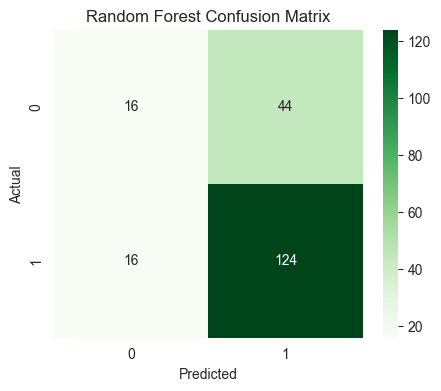

In [17]:
# Random Forest Evaluation
y_pred_rf = models['Random Forest'].predict(X_test)
y_proba_rf = models['Random Forest'].predict_proba(X_test)[:,1]

print("Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba_rf),2))

# Confusion Matrix Plot
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


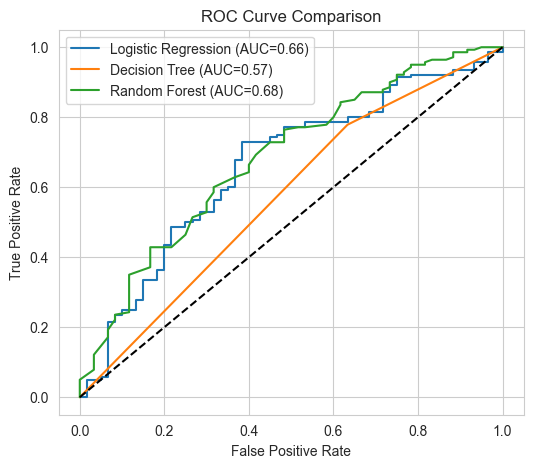

In [18]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(6,5))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
